# Lab | Customer Analysis Round 5

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.
Get the data

We are using the marketing_customer_analysis.csv file.
Dealing with the data

Already done in the round 2.
Explore the data

Done in the round 3.
Processing Data

(Further processing...)

    X-y split.
    Normalize (numerical).


In [79]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
import math
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [20]:
marketing_customer_analysis = pd.read_csv('marketing_customer_analysis.csv')

In [21]:
marketing_customer_analysis.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [22]:
marketing_customer_analysis.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [40]:
filt_mca = marketing_customer_analysis[['Customer Lifetime Value','Income','Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies','Total Claim Amount']]

# X-y split.

In [41]:
filt_mca_y = filt_mca[['Total Claim Amount']]
filt_mca_x = filt_mca[['Customer Lifetime Value','Income','Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies']]

# Normalizing data
transformer = Normalizer().fit(b_num)
b_num_normalized_np = transformer.transform(b_num)

b_num_normalized= pd.DataFrame(b_num_normalized_np)

type(b_num_normalized)

In [44]:
filt_mca_x.columns

#filtered_data.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')

In [48]:
transformer = Normalizer().fit(filt_mca_x) 
filt_mca_x_norm_np = transformer.transform(filt_mca_x)
filt_mca_x_norm = pd.DataFrame(filt_mca_x_norm_np)

type(filt_mca_x_norm)
filt_mca_x_norm.columns= filt_mca_x.columns

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']
column >> Customer Lifetime Value
Customer Lifetime Value


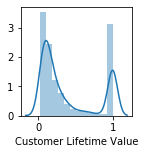

column >> Income
Income


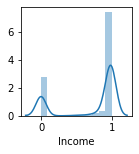

column >> Monthly Premium Auto
Monthly Premium Auto


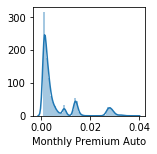

column >> Months Since Last Claim
Months Since Last Claim


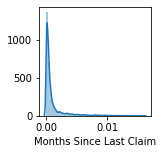

column >> Months Since Policy Inception
Months Since Policy Inception


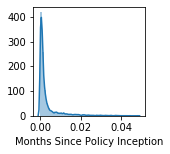

column >> Number of Open Complaints
Number of Open Complaints


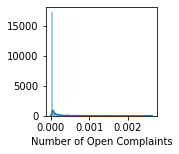

column >> Number of Policies
Number of Policies


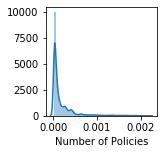

In [49]:
cols = list(filt_mca_x_norm.columns)
print(cols)

for col in cols:
    print("column >>",col)
    #print("skew ={}.format(filt_mca_x_norm[col]),skew(filt_mca_x_norm[filt_mca_x_norm[col]]))
    #print("skew ={}".format(filt_mca_x_norm[col]),skew(filtered_data_norm[filt_mca_x_norm[col]]))
    fig,ax = plt.subplots(figsize=(2,2))
    print(col)
    ax= sns.distplot(filt_mca_x_norm[col])
    plt.show()

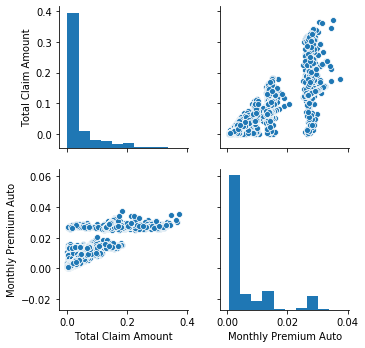

In [50]:
sns.pairplot(filtered_data_norm[["Total Claim Amount","Monthly Premium Auto"]])
plt.show()

In [53]:
Y = filtered_data_norm["Total Claim Amount"]

In [54]:
X = filtered_data_norm[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies']]

In [57]:
X.head()
X.shape
type(X)

pandas.core.frame.DataFrame

In [62]:
# train split

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=15)

In [63]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
1749,0.081850,0.996639,0.001020,0.000215,0.001221,0.0,0.000040
4165,0.618061,0.784993,0.008493,0.001026,0.000615,0.0,0.000123
6405,0.315755,0.948627,0.004054,0.000818,0.003202,0.0,0.000102
6102,0.999560,0.000000,0.003188,0.000568,0.001458,0.0,0.000049
7945,0.119095,0.992881,0.001490,0.000084,0.000731,0.0,0.000042


In [66]:
X_train2,X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size=0.3, random_state=13)
X_train2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
7953,0.994510,0.000000,0.014299,0.001172,0.011955,0.0,0.001641
1578,0.052589,0.998602,0.001317,0.000234,0.000640,0.0,0.000012
160,0.958283,0.000000,0.026391,0.000419,0.002095,0.0,0.000419
4730,0.993707,0.000000,0.013192,0.004816,0.018426,0.0,0.000628
1755,0.230718,0.973016,0.001902,0.000400,0.001422,0.0,0.000032


In [68]:
model = LinearRegression()

In [69]:
lm = model.fit(X_train,Y_train)

In [70]:
predictions = lm.predict(X_test)

In [73]:
residuals = predictions - Y_test

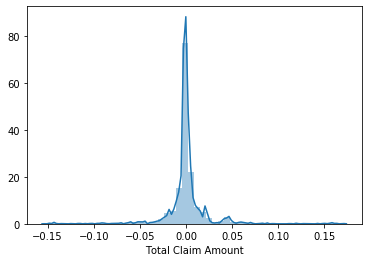

In [76]:
sns.distplot(residuals)

In [94]:
MAE = mean_absolute_error(Y_test, predictions)
MSE = mean_squared_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test, predictions)

In [95]:
print("MAE of the linear model on test set: %5.3f"%(MAE))
print("MSE of the linear model on test set: %5.3f"%(MSE))
print("RMSE of the linear model on test set: %5.3f"%(RMSE))
print("R2 of the linear model on test set: %5.3f"%(R2))

MAE of the linear model on test set: 0.011
MSE of the linear model on test set: 0.001
RMSE of the linear model on test set: 0.023
R2 of the linear model on test set: 0.841
